# Tarea 18
# Mapeo Logistico

El mapeo logistico $x_n+1=f(x_n)=rx_n(1-x_n)$, que
puede interpretarse como un modelo de población en un sistema en el que los recursos son
limitados. El crecimiento exponencial dado por la parte $x_n+1=rx_n$ resulta limitado por la nolinealidad $-rx^2n$, que representa la competencia entre los individuos por los recursos compartidos.

Donde r es el parámetro de control. Las repeticiones iteradas generan una secuencia de puntos conocida como órbita donde $\:\:r\in[0,4]\:\mathrm{y}\:x\in[0,1]$

Usando exponente de Lyapunov $\lambda$ que está dado por $\lambda(x_{0})=\lim_{n\to\infty}\frac{1}{n}\sum_{i=0}^{n-1}\log\left|\:f'(x_{i})\right|\:\:\mathrm{con}\:\:x_{i}=f(x_{i-1}).$ para cada orbita que inicia de $x_0$

In [2]:
using PyPlot

In [7]:
include("herramientas.jl")

In [25]:
function explyap(f,x0,list,n)
    
    L = [] #Guardamos la aproximación del exponente de lyapunov.
    B = []#Guardamos las iteraciones para el diagrama de fases.
    rB = []#Guardamos las bifurcaciones.
    
    for r in list
        x = x0
        g(z) = f(z,r) #Decimos que al dar una r la función solo depende de una variable.
        y = herramientas.derivada_númerica2(g,x)
        l = log(abs(y))#Valor absolutO de la derivada.
        for i in 2:n
            x = f(x,r)
            y = herramientas.derivada_númerica2(g,x)
            l += log(abs(y))#se aplica la definición del exponente de Lyapunov
        end
        push!(L,l/n)
        for j in 1:200
            x = f(x,r) #iteramos para usarlo en el diagrama de bifurcaciones
            push!(B,x)
            push!(rB,r)
        end
    end
    return L,rB,B 
end

explyap (generic function with 1 method)

In [23]:
f(x,r)=r*x*(1-x) #Fórmula de recurrencia.

f (generic function with 1 method)

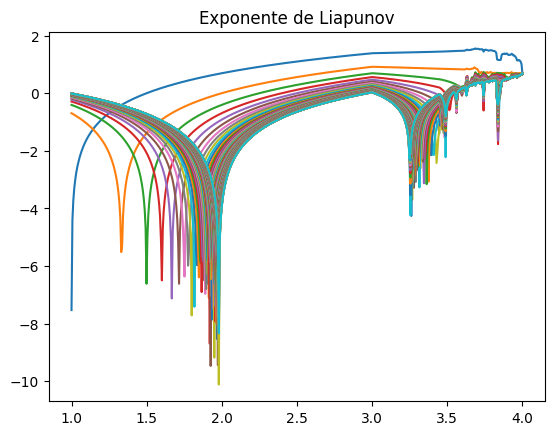

In [24]:
title("Exponente de Liapunov")
r=linspace(1,4,500)
L=explyap(f,0.1,r,10000)
plot(r,L[1])
legend()

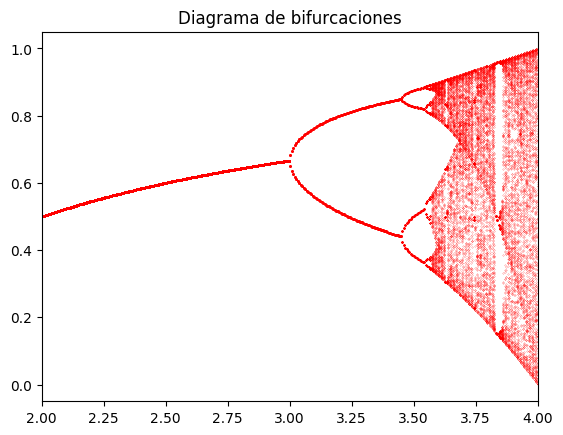

(2,4)

In [19]:
plot(L[2],L[3],"r.",markersize=0.3)
title("Diagrama de bifurcaciones")
xlim(2,4)